# AIN 214 - PA4 - 2023
## Building kNN and Logistic Regression Classifiers


# THE STUDENT INFO
## Student Name: Sümeyra Koç
## Student ID: 2210765020

# Dataset: We will use the Breast Cancer Wisconsin (Diagnostic) Dataset available on Kaggle for the assignment. 
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

## 1. Data Preprocessing

In this section, you will:
- Import necessary libraries
- Load the dataset
- Handle missing values and outliers
- Convert non-numeric values to numeric 
- Perform data normalization

In [239]:
import pandas as pd
import numpy as np
from scipy import stats # to detect outliers
from sklearn.preprocessing import MinMaxScaler # to normalization
# to visualization
import seaborn as sns
import matplotlib.pyplot as plt
# to kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
# for logistic regression
from sklearn.linear_model import LogisticRegression
# for confusion matrix 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# to calculate report of models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# to plot the recall-predict curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [240]:
# Load the dataset
data = pd.read_csv("data.csv")
breast_cancer_data = pd.DataFrame(data)
breast_cancer_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


When we load the data, one more column appeared other than the columns in the original data, which is named "unnamed column:32". It is a little problem that we don't know its reason, we will just drop it

In [241]:
# Drop the "unnamed column: 32"
breast_cancer_data = breast_cancer_data.iloc[:, :-1]                                                      
breast_cancer_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [242]:
# Handle missing values
breast_cancer_data.isnull().sum()


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

There is no missing data 

In [243]:
# Convert non-numeric values to numeric 
# Before handle the outliers, let's convert non-numerşc values to the numeric values to make it easy
map = {'M': 1, 'B': 0}
breast_cancer_data['diagnosis'] = data['diagnosis'].map(map)
breast_cancer_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [244]:
# Detect outliers
z_scores_all_columns = breast_cancer_data.apply(lambda x: np.abs(stats.zscore(x)))
threshold = 3
outliers = breast_cancer_data[(z_scores_all_columns > threshold).any(axis=1)]
outliers

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.26540,0.4601,0.11890
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.25750,0.6638,0.17300
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.2273,0.08543,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.1050,0.22100,0.4366,0.20750
12,846226,1,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.2065,0.11180,...,20.960,29.94,151.70,1332.0,0.10370,0.39030,0.3639,0.17670,0.3176,0.10230
14,84667401,1,13.73,22.61,93.60,578.3,0.11310,0.22930,0.2128,0.08025,...,15.030,32.01,108.80,697.7,0.16510,0.77250,0.6943,0.22080,0.3596,0.14310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,925291,0,11.51,23.93,74.52,403.5,0.09261,0.10210,0.1112,0.04105,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
561,925311,0,11.20,29.37,70.67,386.0,0.07449,0.03558,0.0000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
562,925622,1,15.22,30.62,103.40,716.9,0.10480,0.20870,0.2550,0.09429,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.3514,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400


There are 82 outliers which will be handled

Handle outliers
* Because there are 82 outlier data out of 562 data, we can't drop the outliers.
* It is a very high rate that one outlier out of every 7 data so that dropping all of them makes us lose our accuracy.
* The fact that the amount of outliers in the data set shows us these outliers have crucial information about our data.
* Since median imputation method is more resistance to outliers then mean imputation method, if we use this technique, we may come across losing important data that outliers carry. That's why we'll use the mean method, which is less resistant to outliers.

In [245]:
# Handle outliers
# Identify outliers and replace them with NaN in the original dataset
breast_cancer_data_no_outliers = breast_cancer_data.mask(z_scores_all_columns > threshold)

# Impute NaN values with the mean of each column
breast_cancer_data_no_outliers = breast_cancer_data_no_outliers.fillna(breast_cancer_data.mean())
breast_cancer_data_no_outliers

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302.0,1,17.99,10.38,122.80,1001.0,0.11840,0.104341,0.300100,0.14710,...,25.380,17.33,184.60,2019.0,0.162200,0.665600,0.711900,0.2654,0.460100,0.118900
1,842517.0,1,20.57,17.77,132.90,1326.0,0.08474,0.078640,0.086900,0.07017,...,24.990,23.41,158.80,1956.0,0.123800,0.186600,0.241600,0.1860,0.275000,0.089020
2,84300903.0,1,19.69,21.25,130.00,1203.0,0.10960,0.159900,0.197400,0.12790,...,23.570,25.53,152.50,1709.0,0.144400,0.424500,0.450400,0.2430,0.361300,0.087580
3,84348301.0,1,11.42,20.38,77.58,386.1,0.09636,0.104341,0.241400,0.10520,...,14.910,26.50,98.87,567.7,0.132369,0.254265,0.686900,0.2575,0.290076,0.083946
4,84358402.0,1,20.29,14.34,135.10,1297.0,0.10030,0.132800,0.198000,0.10430,...,22.540,16.67,152.20,1575.0,0.137400,0.205000,0.400000,0.1625,0.236400,0.076780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424.0,1,21.56,22.39,142.00,1479.0,0.11100,0.115900,0.243900,0.13890,...,25.450,26.40,166.10,2027.0,0.141000,0.211300,0.410700,0.2216,0.206000,0.071150
565,926682.0,1,20.13,28.25,131.20,1261.0,0.09780,0.103400,0.144000,0.09791,...,23.690,38.25,155.00,1731.0,0.116600,0.192200,0.321500,0.1628,0.257200,0.066370
566,926954.0,1,16.60,28.08,108.30,858.1,0.08455,0.102300,0.092510,0.05302,...,18.980,34.12,126.70,1124.0,0.113900,0.309400,0.340300,0.1418,0.221800,0.078200
567,927241.0,1,20.60,29.33,140.10,1265.0,0.11780,0.104341,0.088799,0.15200,...,25.740,39.42,184.60,1821.0,0.165000,0.254265,0.272188,0.2650,0.408700,0.124000


In [246]:
# to see if we do the imputation properly 
breast_cancer_data_no_outliers.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

As you can see there is no outlier anymore

 Perform data normalization
* We will use min-max normalization because there are huge scale difference between data features. For example : smoothness_se fetaure has record like 0.006399 meanwhile area_worst feature has record like 2398
* By scaling the values in the columns between 0 and 1, the model can be made to perform decently
* Outliers can affect the Min-Max normalization, but since we handled all outliers, there are no outliers anymore in our data.

Before normalization it is important to mention that there is a id column in the data set which it is pointless to apply normalization to it. Of course we won't apply normalization to this column, to do that we will drop that column and after normalization we will add back it to the dataset.

In [247]:
# Temporarily separate the id column
data = breast_cancer_data_no_outliers
ids = data['id']
data_without_id = data.drop('id', axis=1)

# Perform data normalization by using min-max normalization
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data_without_id)

# Create a new dataFrame by adding normalized data back to the original dataset
normalized_breast_cancer_data_with_id = pd.DataFrame(normalized_data, columns=data_without_id.columns)
normalized_breast_cancer_data_with_id.insert(0, 'id', ids)
normalized_breast_cancer_data_with_id

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302.0,1.0,0.623775,0.031294,0.686387,0.555916,0.749296,0.356649,0.937520,0.908025,...,0.764680,0.172571,0.858047,0.771542,0.703315,0.936337,0.838615,0.912027,0.952321,0.784907
1,842517.0,1.0,0.769959,0.376460,0.774129,0.766613,0.298029,0.248762,0.271478,0.433148,...,0.747590,0.370166,0.693075,0.745035,0.406629,0.233692,0.284604,0.639175,0.371706,0.417650
2,84300903.0,1.0,0.720097,0.539000,0.748936,0.686872,0.631318,0.589875,0.616682,0.789506,...,0.685364,0.439064,0.652791,0.641114,0.565788,0.582667,0.530569,0.835052,0.642409,0.399951
3,84348301.0,1.0,0.251516,0.498365,0.293545,0.157277,0.453818,0.356649,0.754139,0.649383,...,0.305872,0.470588,0.309866,0.160931,0.472832,0.332950,0.809165,0.884880,0.418995,0.355283
4,84358402.0,1.0,0.754094,0.216254,0.793241,0.747812,0.506636,0.476115,0.618557,0.643827,...,0.640228,0.151121,0.650873,0.584736,0.511705,0.260683,0.471198,0.558419,0.250627,0.267207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424.0,1.0,0.826052,0.592247,0.853184,0.865802,0.650087,0.405172,0.761949,0.857407,...,0.767748,0.467338,0.739753,0.774907,0.539519,0.269924,0.483803,0.761512,0.155270,0.198009
565,926682.0,1.0,0.745028,0.865950,0.759361,0.724473,0.473120,0.352699,0.449859,0.604383,...,0.690622,0.852454,0.668777,0.650370,0.351001,0.241906,0.378725,0.559450,0.315872,0.139258
566,926954.0,1.0,0.545017,0.858010,0.560420,0.463274,0.295482,0.348082,0.289003,0.327284,...,0.484224,0.718232,0.487819,0.394985,0.330140,0.413827,0.400872,0.487285,0.204831,0.284661
567,927241.0,1.0,0.771658,0.916394,0.836678,0.727066,0.741252,0.356649,0.277411,0.938272,...,0.780456,0.890478,0.858047,0.688236,0.724948,0.332950,0.320637,0.910653,0.791092,0.847591


## 2. Data Visualization

Visualize the data to understand it better:
- Correlation heatmap
- Distribution plots for at least 3 features


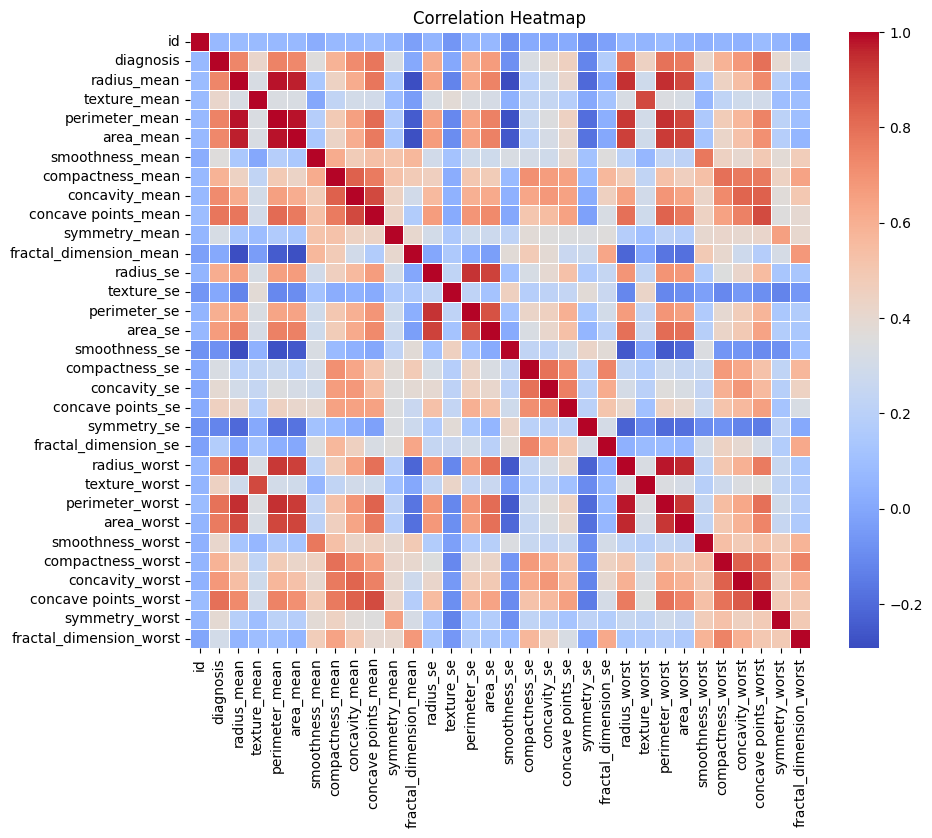

In [248]:
# Correlation heatmap
handled_breast_cancer_data = normalized_breast_cancer_data_with_id
correlation_matrix = handled_breast_cancer_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

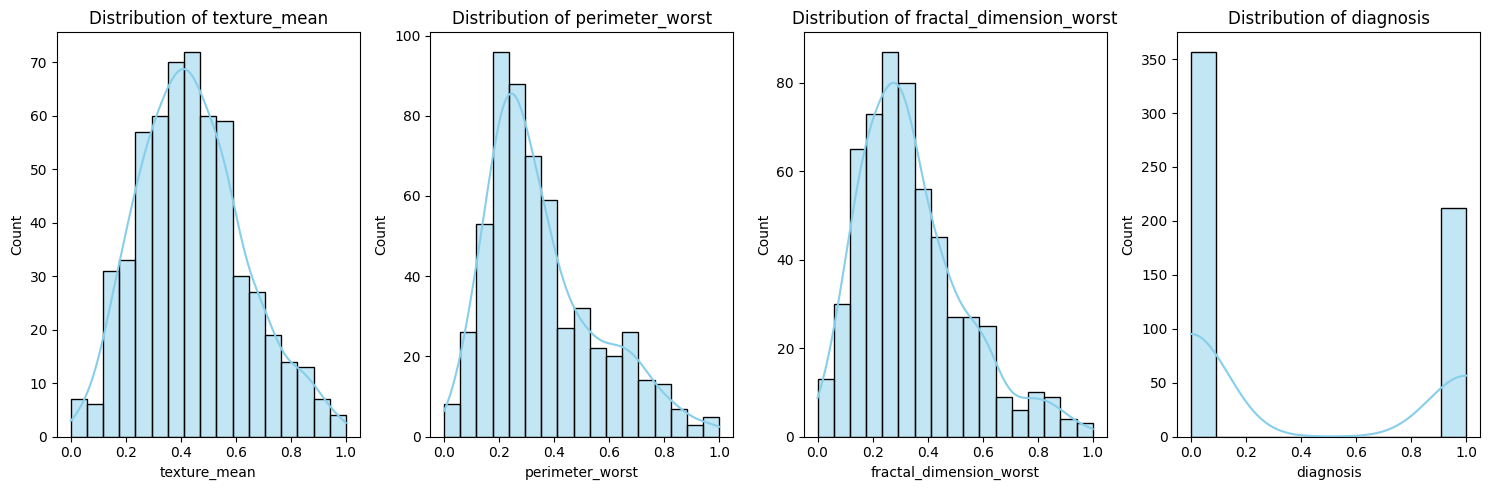

In [249]:
# Distribution plots for at least 3 features

selected_features = ['texture_mean', 'perimeter_worst', 'fractal_dimension_worst','diagnosis']

plt.figure(figsize=(15, 5))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(1, len(selected_features), i)
    sns.histplot(handled_breast_cancer_data[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

## 3. Data Splitting

Manually split the data into training and testing sets in a 70:30 ratio:
- Shuffle and split the data
- Avoid using predefined functions like train_test_split for this task


In [250]:
# Because of the id column have no effect on the diagnosis prediction, we have to drop it to make better prediction. 
handled_breast_cancer_data = handled_breast_cancer_data.drop('id', axis=1)
# Choose the features (X) and target variable (y)
X = handled_breast_cancer_data.drop('diagnosis', axis=1)
y = handled_breast_cancer_data['diagnosis']

# Set a seed for reproducibility
np.random.seed(42)

# Generate random indices for the split
indices = np.random.permutation(len(data))

# Calculate the split point based on a 70:30 ratio
split_point = int(0.7 * len(data))

# Split the data into training and testing sets
train_indices, test_indices = indices[:split_point], indices[split_point:]
train_data, test_data = X.iloc[train_indices], X.iloc[test_indices]
train_labels, test_labels = y.iloc[train_indices], y.iloc[test_indices]

# Display the shape of the training and testing sets
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)
test_data

Training data shape: (398, 30)
Testing data shape: (171, 30)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
169,0.452660,0.338160,0.455477,0.351637,0.483175,0.249643,0.081287,0.233395,0.468445,0.200306,...,0.358457,0.356841,0.346506,0.256016,0.389631,0.200100,0.078313,0.291581,0.263174,0.113569
65,0.441895,0.664643,0.465728,0.340227,0.733208,0.539501,0.395814,0.557346,0.581002,0.507810,...,0.411043,0.694508,0.410448,0.311301,0.723403,0.461061,0.356226,0.554639,0.550816,0.418756
283,0.524619,0.423167,0.564764,0.428914,0.591098,0.675090,0.608560,0.558765,0.530904,0.516998,...,0.465381,0.424764,0.489098,0.355857,0.504752,0.650291,0.592060,0.595189,0.377980,0.630039
85,0.650405,0.411490,0.671618,0.603890,0.485722,0.360675,0.417057,0.542901,0.697463,0.314242,...,0.657318,0.508937,0.650873,0.596516,0.530248,0.266404,0.371893,0.564261,0.668130,0.377950
242,0.244716,0.396077,0.261837,0.159417,0.447915,0.474855,0.483599,0.176173,0.646714,0.818683,...,0.203769,0.518037,0.234989,0.121045,0.490844,0.671121,0.875957,0.418557,0.546738,0.917650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.108051,0.230266,0.130310,0.065154,0.473522,0.561330,0.268853,0.177284,0.547820,0.393189,...,0.079010,0.118622,0.077690,0.041737,0.382678,0.317305,0.168924,0.164467,0.216123,0.655851
106,0.263981,0.402616,0.272609,0.174392,0.692988,0.345563,0.220868,0.215123,0.482108,0.466769,...,0.228309,0.560286,0.224439,0.141577,0.754307,0.350164,0.338438,0.418557,0.389272,0.441618
270,0.414131,0.332088,0.404048,0.317083,0.023864,0.030938,0.022649,0.038580,0.291477,0.116386,...,0.305872,0.280468,0.281540,0.210114,0.112030,0.033841,0.045541,0.114536,0.280113,0.075713
435,0.396566,0.462868,0.411172,0.295624,0.583054,0.394257,0.351765,0.398951,0.396226,0.474119,...,0.399211,0.610335,0.405972,0.287824,0.696361,0.483358,0.479326,0.627835,0.506274,0.620206


## 4. Model Building

### 4.1. kNN Classifier

- Build and train the kNN model
- Choose the optimal k value using Minkowski distance with at least two different values for p 

In [251]:
# Set the parameters for tuning
param_grid = {
    'n_neighbors': list(range(1, 31,2)),  # 1 to 30 for k
    'p': [1, 2]  # Two different values for p (1: Manhattan distance, 2: Euclidean distance)
}

# Initialize the kNN model
knn_model = KNeighborsClassifier()

# Perform grid search with cross-validation to find the best parameters
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(train_data, train_labels)

# Get the best parameters
best_k = grid_search.best_params_['n_neighbors']
best_p = grid_search.best_params_['p']

# Train the model with the best parameters
best_model = KNeighborsClassifier(n_neighbors=best_k, p=best_p)
best_model.fit(train_data, train_labels)

# Make predictions on the testing data
knn_predictions = best_model.predict(test_data)

### 4.2. Logistic Regression

- Build and train the Logistic Regression model

In [252]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Train the model on the training data
logreg_model.fit(train_data, train_labels)

# Make predictions on the testing data
logreg_predictions = logreg_model.predict(test_data)

## 5. Model Evaluation

### 5.1. Confusion Matrix

Analysis of the confusion matrices for both models:
- Plot and interpret the confusion matrices
- Display accuracy, precision, recall, and F1-score for both models

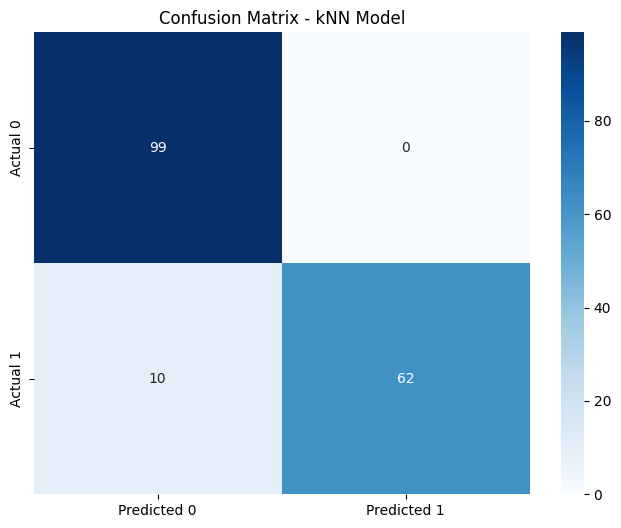

In [253]:
# Confusion matrix for kNN model
knn_conf_matrix = confusion_matrix(test_labels, knn_predictions)

# Plot the Confusion matrix
# Convert to DataFrame for better visualization
conf_matrix_df_knn = pd.DataFrame(knn_conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - kNN Model')
plt.show()

* 1:MELIGNANT - 0:BENIGN
kNN model have predicted type of cancer 62 patients as melignant which is actually melignant (TP), and it have predicted type of cancer 99 patients as benign which is actually benign (TN), it have wrong predicted the rest of patients' cancer type (FN:0-FP:10)

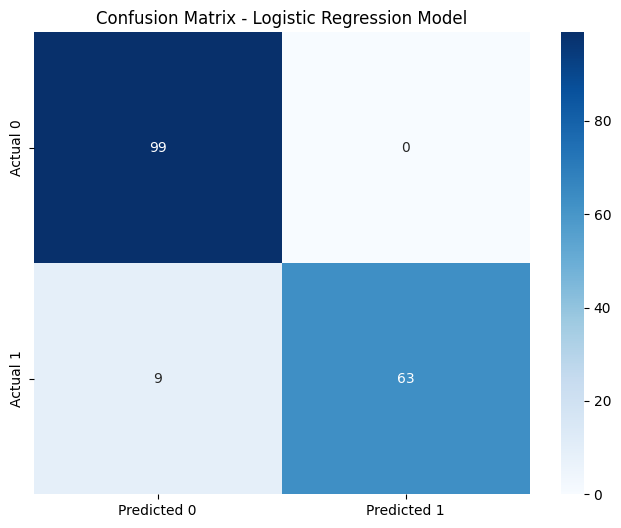

In [254]:
# Confusion matrix for Logistic Regression model
logreg_conf_matrix = confusion_matrix(test_labels, logreg_predictions)

# Plot the Confusion matrix
# Convert to DataFrame for better visualization
conf_matrix_df_logreg = pd.DataFrame(logreg_conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()

Logistic regression model have almost same result with kNN accoridng to the confusion metrics.
* TP:63
* TN:99
* FN:9
* FP:0

In [255]:
# Display accuracy, precision, recall, and F1-score for kNN model
# Calculate metrics
accuracy = accuracy_score(test_labels, knn_predictions)
precision = precision_score(test_labels, knn_predictions)
recall = recall_score(test_labels, knn_predictions)
f1 = f1_score(test_labels, knn_predictions)

# Display the results
print("Metrics for the kNN Model with Best Parameters:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Metrics for the kNN Model with Best Parameters:
Accuracy: 0.9415204678362573
Precision: 1.0
Recall: 0.8611111111111112
F1-score: 0.9253731343283582


In [256]:
# Display accuracy, precision, recall, and F1-score for logistic model
# Calculate metrics
accuracy = accuracy_score(test_labels, logreg_predictions)
precision = precision_score(test_labels, logreg_predictions)
recall = recall_score(test_labels, logreg_predictions)
f1 = f1_score(test_labels, logreg_predictions)

# Display the results
print("Metrics for the kNN Model with Best Parameters:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Metrics for the kNN Model with Best Parameters:
Accuracy: 0.9473684210526315
Precision: 1.0
Recall: 0.875
F1-score: 0.9333333333333333


### 5.2. Precision-Recall Curves

Evaluate the Precision-Recall curves for both models:
- Plot and analyze the curves

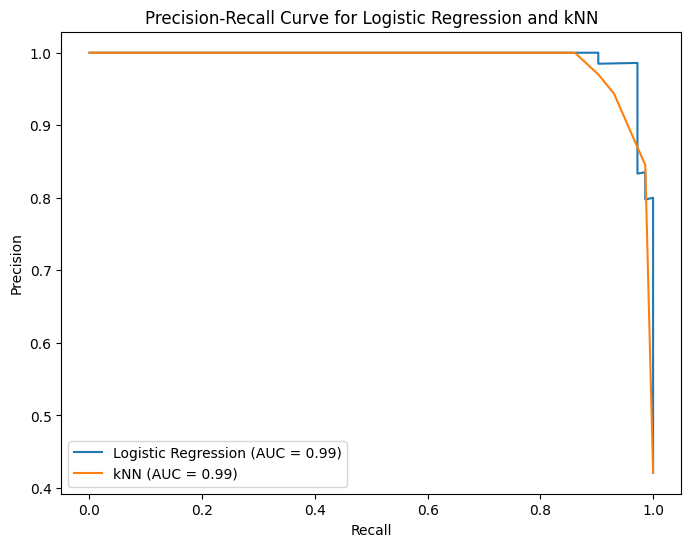

In [257]:
# Calculate Precision-Recall curves for Logistic Regression
logreg_probs = logreg_model.predict_proba(test_data)[:, 1]
precision_logreg, recall_logreg, _ = precision_recall_curve(test_labels, logreg_probs)
auc_logreg = auc(recall_logreg, precision_logreg)

# Calculate Precision-Recall curves for kNN
knn_probs = best_model.predict_proba(test_data)[:, 1]
precision_knn, recall_knn, _ = precision_recall_curve(test_labels, knn_probs)
auc_knn = auc(recall_knn, precision_knn)

# Plot Precision-Recall curves
plt.figure(figsize=(8, 6))

# Logistic Regression
plt.plot(recall_logreg, precision_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')

# kNN
plt.plot(recall_knn, precision_knn, label=f'kNN (AUC = {auc_knn:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression and kNN')
plt.legend()
plt.show()

* Precision focuses on the accuracy of positive predictions, answering the question: "Of all instances predicted as positive, how many are actually positive?"
* 
Recall focuses on the coverage of actual positive instances, answering the question: "Of all actual positive instances, how many were correctly predicted
* PR curves allow for the comparison of different models or model configurations
* A model that provides a curve that is closer to the top-right corner generally performs better?* Area Under the Curve (AUC-PR):The area under the Precision-Recall curve (AUC-PR) is often used as a summary measure of a model's overall performance. A higher AUC-PR indicates better overall performance, considering the trade-off between precision and recall* According to these information the logistic regression model is slightly better then kNN model.ll.er

### 5.3. Choose an appropriate metric to evaulate the models. Compare the models and discuss why you chose the metric.

Choose an appropriate metric 
* Precision and Recall is preferred when:
  * Precision:Situations where False Positives have a high cost. For example, in spam filtering applications, it is costly to mark an actual email as spam.
  * Recall: Cases where False Negatives have a high cost. For example, if a medical test misses the disease, it can lead to serious consequences.
  * Since our models predict that a cancer is benign or malignant, the FN values are very critical for us so that the recall metric is important for us.
* Accuracy is preferred when:
  * The classes are balanced and the error types (False Positive and False Negative) are equally important.
  * In out case  error types are not equally important the False Negative is more important then False Positive.r.

Compare the models according to the selected metric
* for logistic model, Recall: 0.875
* for kNN model, Recall: 0.8611111111111112
* logistic model has higher recall value so taht it is slightly better then kNN model.